## Advanced Regression Assignment 
### By Tushar Prasad

### Business Objective

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 
Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goals

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from datetime import datetime, timedelta

## Reading and Understanding Data

In [2]:
df = pd.read_csv('train.csv') ## reading the data

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape ## checking the shape

(1460, 81)

In [5]:
df.info() ## checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Data Cleaning

In [6]:
df_null = df.isnull().sum()*100/df.shape[0] 

In [7]:
df_null

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
dropped_cols = list(df_null[df_null > 15].index) ## dropping columns with null % greater than 15 %

df.drop(dropped_cols,inplace=True,axis=1)

### Dropping the ID columns

In [9]:
df.drop(['Id'],axis=1,inplace=True)

In [10]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Dropping cols having only single value

In [11]:
uniques = df.apply(lambda x:x.nunique())

In [12]:
uniques[uniques<2] 

Series([], dtype: int64)

#### Since there does't exist any column with only 1 value, we are not going to drop any columns

### Fixing all nan values

In [13]:
df_null = df.isnull().sum()*100/df.shape[0] 

In [14]:
df_null[df_null>0] ## checking all columns with nan values

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [15]:
df_null[df_null>0].index

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')

In [16]:
df[list(df_null[df_null>0].index)].head()

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


### Fixing the numerical columns

#### Fixing MasVnrArea

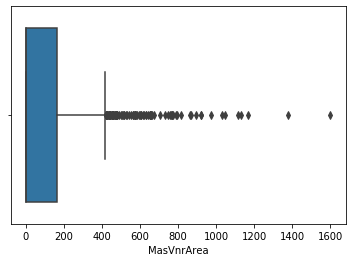

In [17]:
sns.boxplot(df['MasVnrArea']); ### a lot of outliers, hence we will impute median

In [18]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

#### Fixing GarageYrBlt

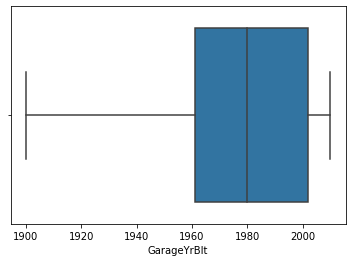

In [19]:
sns.boxplot(df['GarageYrBlt']); ## There aren't any outliers, hence we can impute using mean

In [20]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)

### Fixing categorical variables

#### Fixing Garage Variables

In [21]:
## From the data dictionary, we impute the NA values with No Garage

df['GarageType'].fillna('No Garage',inplace=True)
df['GarageFinish'].fillna('No Garage',inplace=True)
df['GarageQual'].fillna('No Garage',inplace=True)
df['GarageCond'].fillna('No Garage',inplace=True)

####  Fixing Basement Variables

In [22]:
## From the data dictionary, we impute the NA values with No Basement

df['BsmtQual'].fillna('No Basement',inplace=True)
df['BsmtCond'].fillna('No Basement',inplace=True)
df['BsmtExposure'].fillna('No Basement',inplace=True)
df['BsmtFinType1'].fillna('No Basement',inplace=True)
df['BsmtFinType2'].fillna('No Basement',inplace=True)

#### Fixing MasVnrType and Electrical

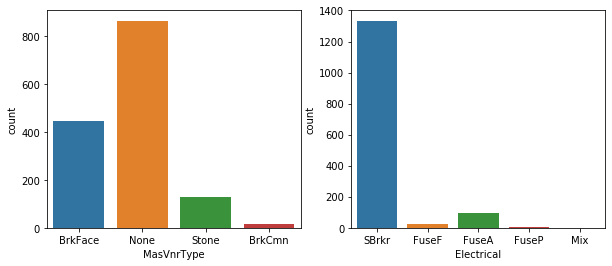

In [23]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.countplot(x = 'MasVnrType', data = df);

plt.subplot(1,2,2)
sns.countplot(x = 'Electrical',  data = df);

In [24]:
## we can input both values using the mode of the data for these columns

df['MasVnrType'].fillna('None',inplace=True)
df['Electrical'].fillna('SBrkr',inplace=True)

In [25]:
df_null = df.isnull().sum()*100/df.shape[0] 

In [26]:
df_null[df_null>0] 

Series([], dtype: float64)

#### Hence, we have fixed all the null values

### Converting Numerical into categorical Variables

In [27]:
## using the data dictionary given to us, we will convert these numerical values into categorical values

df['MSSubClass'] = df['MSSubClass'].replace(
    {
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
    }
)

df['OverallQual'] = df['OverallQual'].replace(
    { 
      10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'
    }
)

df['OverallCond'] = df['OverallCond'].replace(
    { 
      10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'
    }
)

### Fixing the years columns and feature creation

In [28]:
## Instead using the year columns as raw variables, we can take the difference between the current year and the years mentioned
## in the variables to get more insights and do some feature creation

df['CurrentYear'] = datetime.now().year

df["YearBuiltFromCur"] = df['CurrentYear'] - df['YearBuilt']

df["YearRemodAddFromCur"] = df['CurrentYear'] - df['YearRemodAdd']

df["GarageYrBltFromCur"] = df['CurrentYear'] - df['GarageYrBlt']

df["YrSoldFromCur"] = df['CurrentYear'] - df['YrSold']

df.drop(['CurrentYear','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

## EDA

### Checking out the column distribution

In [29]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

In [30]:
## Taking a random sample of numerical columns along Sales Price to see the trends and correlation
numerical_cols[0:5] + ['SalesPrice']

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'SalesPrice']

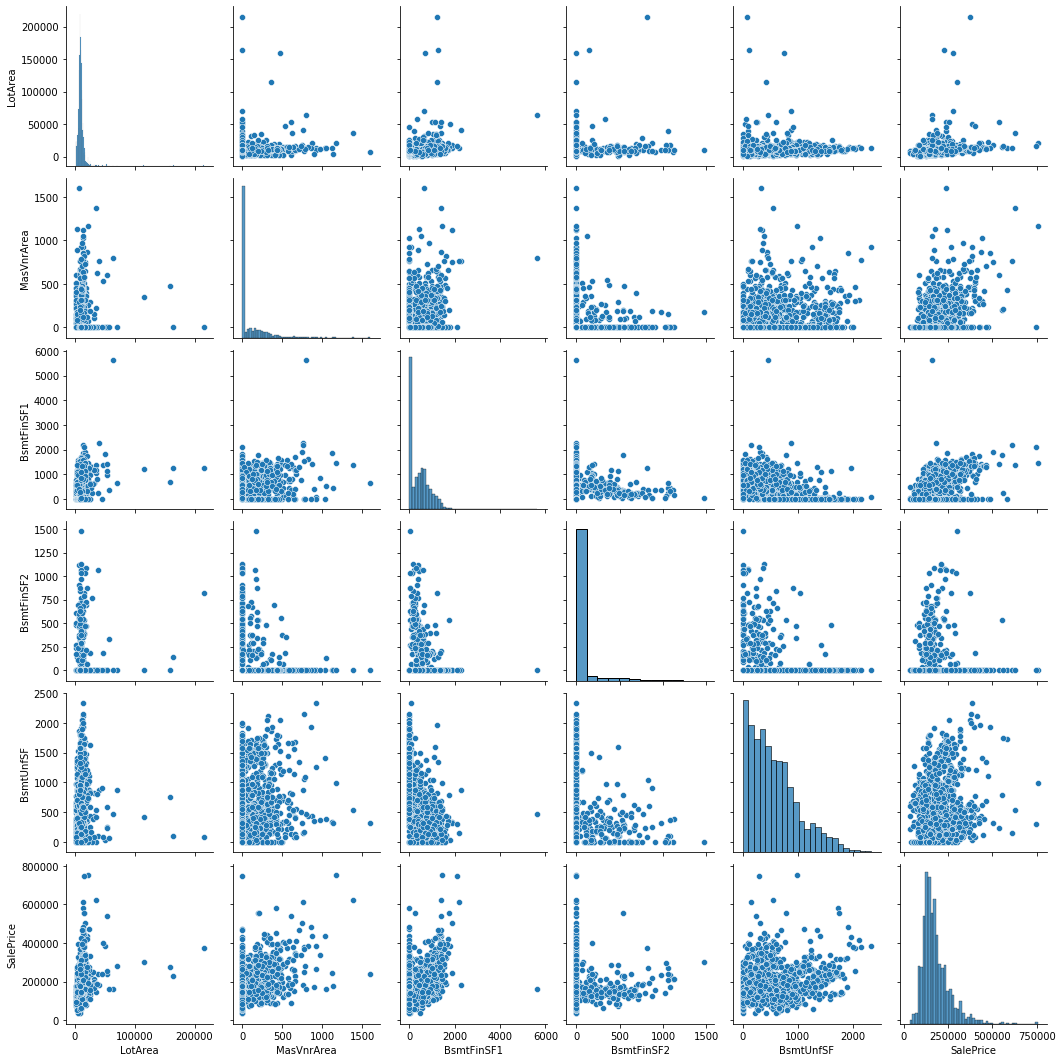

In [31]:
sns.pairplot(df[numerical_cols[0:5] + ['SalePrice']]);

As we can see, there is a positive correlation which can be linear between SalePrice and other variables. This correlation can be linearly defined, which satisfies the condition that the dependent and independent variables are linearly dependent. Hence, while building the model, we have used Linear regression along with regularization methods.

### Checking out the correlation using heatmap

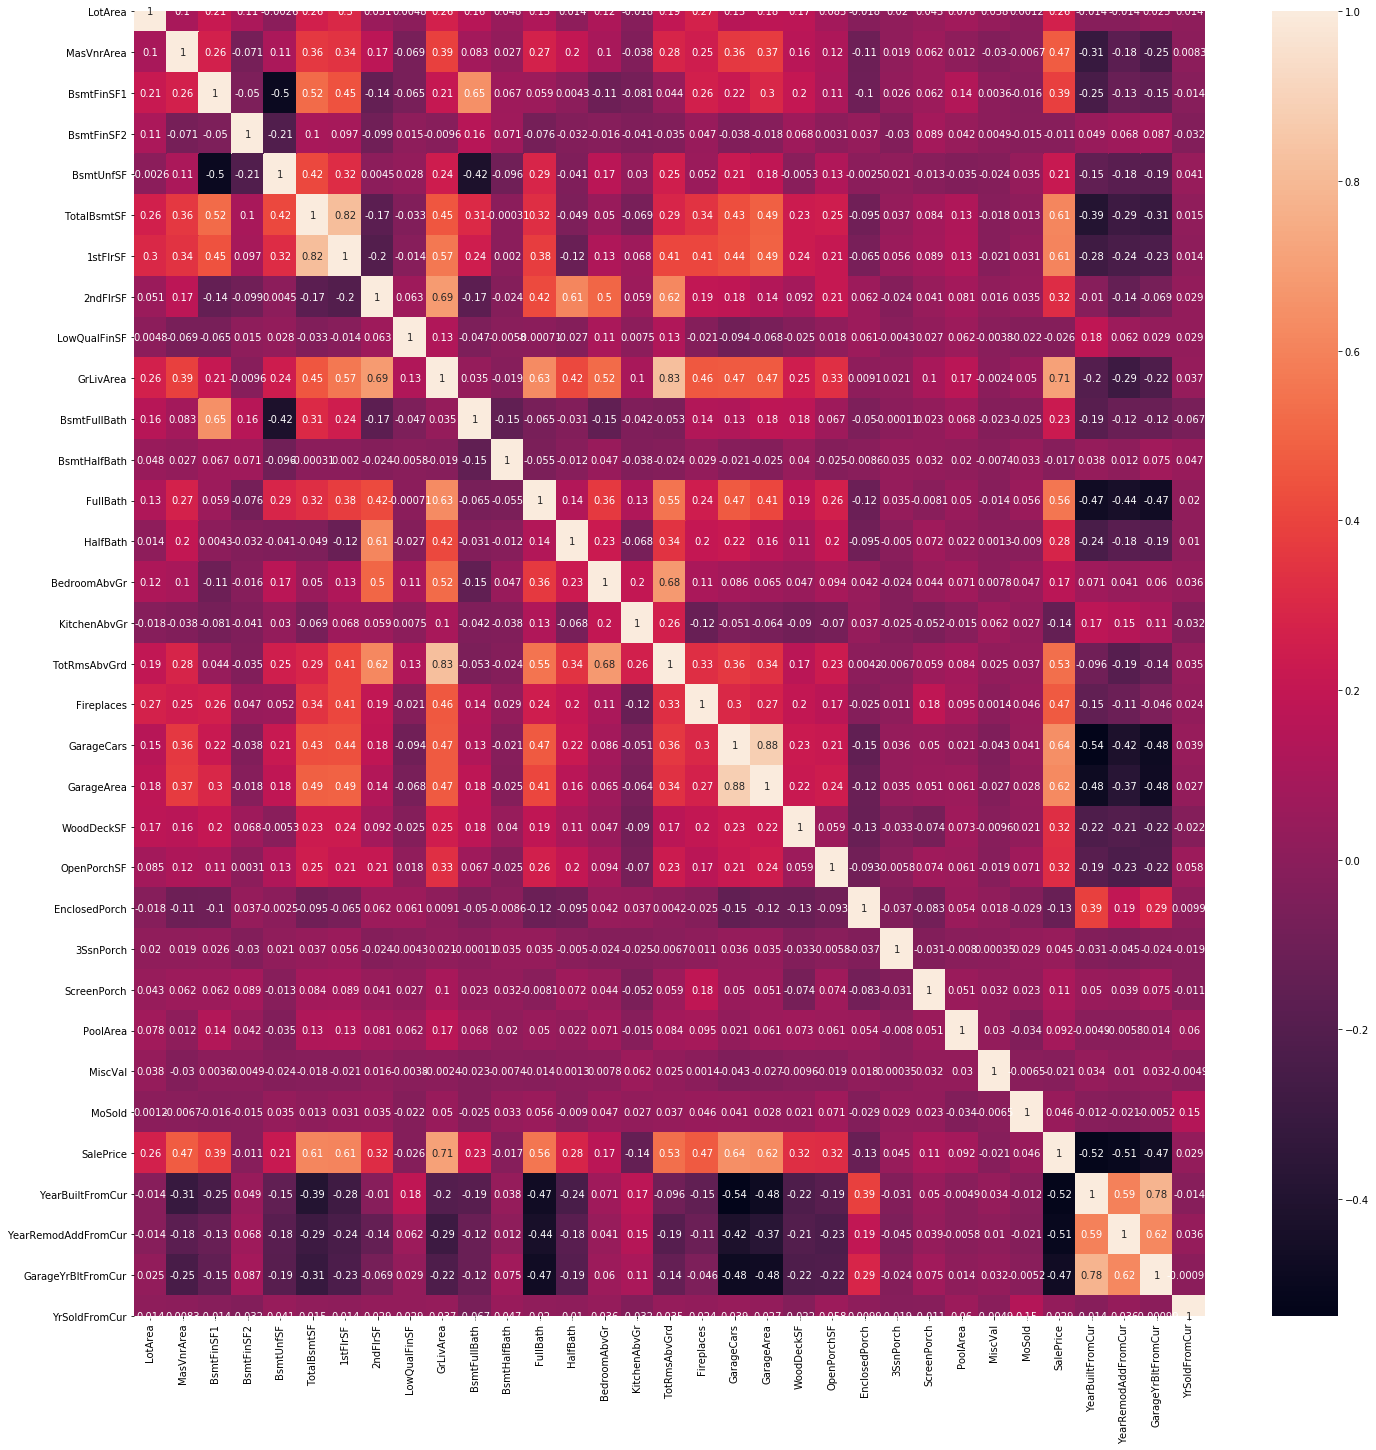

In [32]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), annot = True)

#### From the heatmap, we can see that there are some variables which are highly correlated to each other leading to multicollinearity. Hence we will remove some of them

In [33]:
corr_matrix = df.corr().abs()

sorted_mat = corr_matrix.unstack().sort_values()

sorted_mat[sorted_mat!=1][-8:]  

GarageYrBltFromCur  YearBuiltFromCur      0.780555
YearBuiltFromCur    GarageYrBltFromCur    0.780555
1stFlrSF            TotalBsmtSF           0.819530
TotalBsmtSF         1stFlrSF              0.819530
GrLivArea           TotRmsAbvGrd          0.825489
TotRmsAbvGrd        GrLivArea             0.825489
GarageCars          GarageArea            0.882475
GarageArea          GarageCars            0.882475
dtype: float64

From the data, we can see 3 pairs of variables with correlation higher than 0.8. Hence we can remove one of each pair.
We can remove columns like GarageArea,TotRmsAbvGrd,TotalBsmtSF.

In [34]:
df.drop(['GarageArea','TotRmsAbvGrd','TotalBsmtSF'],inplace=True,axis=1)

## Creating dummy variables

In [35]:
cat_df = df.select_dtypes(include=['object']) #getting all the categorical columns

In [36]:
num_df = df.select_dtypes(include=['int64','float64']) # getting all the numeical columns

In [37]:
cat_df = pd.get_dummies(cat_df,drop_first=True) ## creating dummy variables

In [38]:
df = pd.concat([num_df, cat_df], axis=1) ## merging the categorical and numerical columns back together

In [39]:
df.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuiltFromCur,YearRemodAddFromCur,GarageYrBltFromCur,YrSoldFromCur,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Fuse

### Dividing into X & y

In [40]:
X = df.drop(['SalePrice'], axis=1)

y = df['SalePrice']

### Train test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 265)
X_test Shape: (438, 265)
y_train Shape: (1021,)
y_test Shape: (438,)


### Scaling

In [42]:
scaler = StandardScaler() ## using standard scaler 

In [43]:
num_cols = list(num_df.columns) ## Scaling only the numerical columns
num_cols.remove('SalePrice')
X_train[num_cols] = scaler.fit_transform(X_train[num_cols]) ## Using fit transform method

In [44]:
X_test[num_cols] = scaler.transform(X_test[num_cols]) ## Using only transform method for test values

## Model Building

### Ridge Regression

In [45]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]} ## Setting a range of parameters for regulatization hyperparameters


# initiating the model
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)      

## training the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [46]:
print(model_cv.best_params_) ## The best lambda is 20

{'alpha': 20}


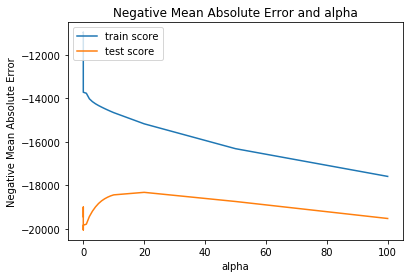

In [47]:
### Trying to plot the results into a visualization using Negative mean Absolute error. (higher it is, the better is the model)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]

# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the graph and the results, alpha = 20 has the highest mean test score. Hence for ridge regression, we will take the lambda to be 20.

In [48]:
## Retraining the ridge model with the best lambda 

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.64292797e+03,  4.17651795e+03,  1.19784215e+03,  1.89826426e+03,
        2.99823999e+03,  6.97472372e+03,  1.54055055e+04, -1.40008674e+03,
        1.76958870e+04,  4.60698909e+03,  9.32356294e+02,  4.95722066e+03,
        1.13666938e+03, -1.60503200e+03, -5.23614468e+03,  4.01483515e+03,
        9.72337097e+03,  2.06086544e+03, -4.34645282e+02,  8.01080196e+02,
        1.47051741e+03,  1.54800007e+03, -1.35763782e+03,  2.30579551e+02,
       -4.78980204e+02, -7.45857812e+03, -3.56238343e+03,  4.05113766e+02,
        1.02373937e+03,  8.82478802e+02,  9.26057840e+01,  7.19924851e+03,
       -4.48732662e+03,  1.68007555e+03, -2.90648008e+03,  2.26561224e+02,
        3.72521687e+03, -3.44960952e+03, -7.49210116e+03,  4.31699347e+02,
       -1.70849341e+03,  8.38729253e+02,  2.18827588e+02,  3.61958138e+03,
        2.24785993e+03,  4.87882470e+03, -1.13231486e+03,  3.73122334e+03,
        2.47760173e+03, -8.70967351e+03,  9.04547607e+02,  7.03693759e+03,
        5.03630810e+03,  

## Lasso


In [49]:
## initiating the model

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   28.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [50]:
print(model_cv.best_params_) ## The best lambda is 20

{'alpha': 20}


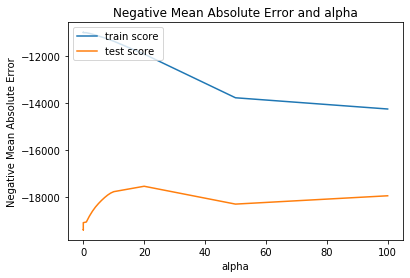

In [51]:
### Trying to plot the results into a visualization using Negative mean Absolute error. (higher it is, the better is the model)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]

# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [52]:
## Retraining the lasso model with the best lambda 

alpha = 20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
## Predicting the ridge and lasso train values

y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

In [54]:
## Predicting the ridge and lasso test values

y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

### Results using R2 score for train and test sets

In [55]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.89
r2_score for lasso: 0.95
r2_score in test dataset:
r2_score for ridge: 0.86
r2_score for lasso: 0.85


#### From the results we can see that the r2 score for both ridge and lasso regression is similar around 86. But the lasso regression has the higher train score. Also, the lasso model will help in feature selection which the ridge model will not do. Hence, we are going to use the lasso model as our choice.

###  Coefficients and Interpretation

In [56]:
betas = pd.DataFrame(index=X.columns)

In [57]:
betas.rows = X.columns

In [58]:
## Finding the coefficients for both the models

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [59]:
## Finding the absolute values

betas['Ridge_abs'] = abs(betas['Ridge'])
betas['Lasso_abs'] = abs(betas['Lasso'])

In [60]:
betas.head()

,Ridge,Lasso,Ridge_abs,Lasso_abs
LotArea,3642.927974,4824.275674,3642.927974,4824.275674
MasVnrArea,4176.517946,2774.535246,4176.517946,2774.535246
BsmtFinSF1,1197.842145,8930.697280,1197.842145,8930.697280
BsmtFinSF2,1898.264259,3872.450600,1898.264259,3872.450600
BsmtUnfSF,2998.239987,5519.241729,2998.239987,5519.241729


In [61]:
betas.shape ## There are 265 coefficients

(265, 4)

In [62]:
betas = betas[betas['Lasso']!=0]

In [63]:
betas.shape ## The lasso model removed 75 variables which weren't useful according to the model

(190, 4)

In [64]:
betas = betas.reset_index()

In [65]:
betas['raw_variables'] = betas['index'].apply(lambda x: x.split('_')[0]) ## Finding the raw variables from dummy variables

In [66]:
### These are the 10 most significant variables

betas.sort_values('Lasso_abs')[-10:][['index','Lasso']]

,index,Lasso
93,OverallQual_Excellent,60502.292168
95,OverallQual_Very Excellent,99506.432319
109,RoofMatl_Metal,363207.271164
110,RoofMatl_Roll,372601.862805
111,RoofMatl_Tar&Grv,373601.833118
112,RoofMatl_WdShake,378564.290162
81,Condition2_PosN,-387131.187495
108,RoofMatl_Membran,387325.113779
107,RoofMatl_CompShg,393596.036727
113,RoofMatl_WdShngl,452178.756539


In [67]:
## These are the 5 most significantly associated positive variables

betas[betas['Lasso']>0].sort_values('Lasso_abs')[-5:][['index','Lasso']]

,index,Lasso
111,RoofMatl_Tar&Grv,373601.833118
112,RoofMatl_WdShake,378564.290162
108,RoofMatl_Membran,387325.113779
107,RoofMatl_CompShg,393596.036727
113,RoofMatl_WdShngl,452178.756539


In [68]:
## These are the 5 most significantly associated negative variables

betas[betas['Lasso']<0].sort_values('Lasso_abs')[-5:][['index','Lasso']]

,index,Lasso
165,KitchenQual_Gd,-18886.753661
139,BsmtQual_Gd,-19764.079074
101,OverallCond_Fair,-20260.298917
169,Functional_Sev,-21457.605490
81,Condition2_PosN,-387131.187495


In [69]:
### These are the raw variables having postive coefficients 

betas[betas['Lasso']>0]['raw_variables'].unique()

array(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'GarageYrBltFromCur', 'YrSoldFromCur',
       'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType',
       'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype=object)

In [70]:
## These are the raw variables having negative coefficients 

betas[betas['Lasso']<0]['raw_variables'].unique()

array(['LowQualFinSF', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'MoSold', 'YearBuiltFromCur', 'YearRemodAddFromCur', 'MSSubClass',
       'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'],
      dtype=object)

## Conclusion

We got good results for Ridge and Lasso Regression models

Ridge Regression:
Train R2 score : 0.89
Test R2 score : 0.86

Lasso Regression:
Train R2 score : 0.95
Test R2 score : 0.85

Optimal Lambda was 20 in both the cases.
Because of feature selection, we will choose the Lasso Regression model



(RoofMatl_Tar&Grv,373601.833118)
(RoofMatl_WdShake,378564.290162)
(RoofMatl_Membran,387325.113779)
(RoofMatl_CompShg,393596.036727)
(RoofMatl_WdShngl,452178.756539)

#### These are the 5 most important postively correlated variables and the magnitude of the coefficients represents how much the model is dependent on it. Higher the magnitude, more the dependency.

Hence, the company should target to acquire houses having roof material with Wood Shingles, Wood Shakes, Standard (Composite) Shingle,Membrane and Gravel & Tar. These will have high sales price. 

#### Similarly, we can also find the 5 most important negatively correlated variable (as shown above), which we should either avoid since they will have a low sales price, or try to acquire them at a low cost and sell them at higher price.

#### The company can also do, is buy houses having features corresponding to negative correlation on the cheap and sell them with a higher cost by highlighting the positively correlated features.

### Solving for Question 3

In [71]:
imp_variables = ['RoofMatl_WdShake','Condition2_PosN','RoofMatl_Membran','RoofMatl_CompShg','RoofMatl_WdShngl']


In [72]:
X_train_new = X_train.drop(imp_variables,axis=1)

In [73]:
alpha = 20

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_new, y_train)

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
beta_new = pd.DataFrame(index=X_train_new.columns)

In [75]:
beta_new.rows = X_train_new.columns

In [76]:
beta_new['Lasso'] = lasso_new.coef_

In [77]:
beta_new['Lasso_abs'] = abs(beta_new['Lasso'])

In [78]:
beta_new.sort_values('Lasso_abs')[-5:]

,Lasso,Lasso_abs
Condition2_RRNn,59986.950806,59986.950806
Condition2_Feedr,61953.286495,61953.286495
Condition2_Norm,66820.263846,66820.263846
OverallQual_Excellent,67753.620041,67753.620041
OverallQual_Very Excellent,91009.980312,91009.980312
